Dataset from Kaggle:

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

700k vehicles for sale taken from Craigslist in November. Blank entries indicate that the listing did not provide said information.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('input/craigslistVehicles.csv')

1. Target label = 'price'
2. Drop not used features: 'url', 'VIN', 'image_url', 'lat', 'long'

In [111]:
df.drop(columns=['url', 'VIN', 'image_url', 'lat', 'long'], inplace=True)

## Explore main data set features and target labels

In [5]:
df.shape

(677812, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 15 columns):
city            677812 non-null object
price           677812 non-null int64
year            677514 non-null float64
manufacturer    624214 non-null object
make            650319 non-null object
condition       397822 non-null object
cylinders       401581 non-null object
fuel            670034 non-null object
odometer        453250 non-null float64
title_status    673279 non-null object
transmission    670682 non-null object
drive           415113 non-null object
size            231502 non-null object
type            398859 non-null object
paint_color     402534 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 77.6+ MB


There are many missing values

In [7]:
df.describe()

,price,year,odometer
count,6.778120e+05,677514.000000,4.532500e+05
mean,6.145579e+05,2005.014767,1.125260e+05
std,4.469918e+07,12.037830,1.340298e+05
min,1.000000e+00,1900.000000,0.000000e+00
25%,3.500000e+03,2002.000000,5.600000e+04
50%,7.500000e+03,2007.000000,1.052265e+05
75%,1.550000e+04,2013.000000,1.510000e+05
max,4.294967e+09,2019.000000,1.000000e+07


In [8]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN
1,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,fwd,full-size,sedan,grey
2,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,rwd,mid-size,coupe,red
3,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN
4,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,4wd,NaN,truck,white


In [112]:
# Replace 'other' values to 'NaN' and convert value type to 'float' for feature 'cylinders'
df['cylinders'] = df['cylinders'].replace('other', np.NaN)
df['cylinders'] = df['cylinders'].apply(lambda num: float(num[0]) if type(num) == np.str else np.NaN)

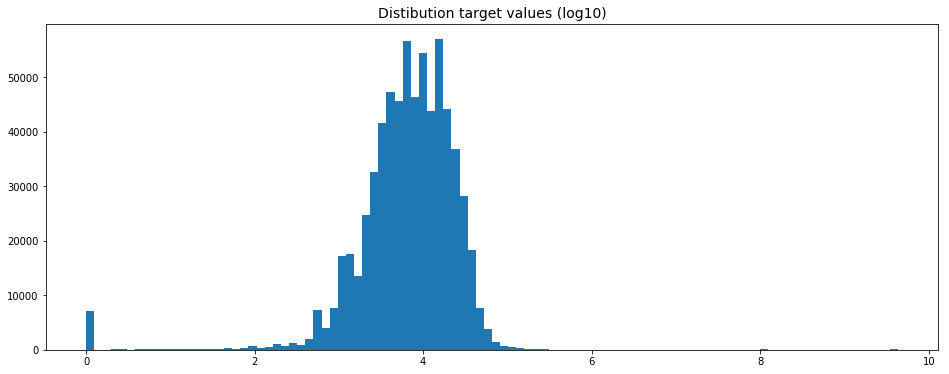

In [10]:
plt.figure(figsize=(16,6))
plt.title('Distibution target values - price (log10)', fontsize=14)
plt.hist(np.log10(df.price), bins = 100);

In [11]:
# Top-10 popular manufacturers of car
df.manufacturer.value_counts()[:10]

ford         116051
chevrolet    103722
toyota        45266
honda         34698
nissan        31358
dodge         30337
jeep          29796
gmc           28033
ram           22908
bmw           16593
Name: manufacturer, dtype: int64

In [12]:
# dataset for top-10 popular manufacturers of car
df_top10 = df[df.manufacturer.isin(df.manufacturer.value_counts()[:10].index.values)]

In [13]:
df_top10.pivot_table(['price', 'cylinders', 'year'], ['manufacturer'], aggfunc='mean')

,cylinders,price,year
manufacturer,,,
bmw,5.965701,3.484894e+05,2007.517206
chevrolet,6.806205,4.280817e+05,2002.746274
dodge,6.301164,8.875070e+05,2005.628012
ford,6.570330,4.009895e+05,2003.862431
gmc,7.339410,2.728131e+05,2006.038704
honda,4.603134,5.717616e+05,2007.031673
jeep,5.874430,3.645188e+05,2005.965834
nissan,5.144755,1.784075e+06,2009.379297
ram,7.143005,2.600053e+05,2009.024795


In [14]:
# The top of most costed manufacturers of cars
df.groupby(['manufacturer'])['price'].agg([np.mean]).sort_values(by='mean', ascending=False).T

manufacturer,nissan,chrysler,kia,pontiac,hyundai,dodge,saturn,mitsubishi,acura,mercedes-benz,...,cadillac,lincoln,land rover,jaguar,morgan,mini,fiat,volvo,buick,datsun
mean,1.784075e+06,1.469033e+06,1.339839e+06,1.000582e+06,959151.723222,887507.004879,729427.054326,688102.669692,664548.556977,652901.22423,...,12135.457493,11686.510672,10566.244444,10097.275089,9894.0,9860.752653,9325.607533,9026.154382,7954.924717,6655.611374


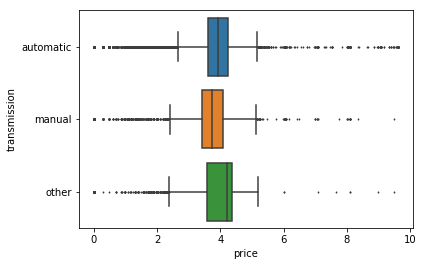

In [15]:
# Let's see relataion between transmission/price
sns.boxplot(y=df_top10.transmission, x=np.log10(df_top10.price), orient="h", fliersize=1);

## Feature engineering for the new parameters

In [113]:
# Age of car
df['age'] = 2019 - df.year

In [114]:
# Odometer from miles to kilometers
df['odometer_km'] = round(df.odometer / 1.609)

In [115]:
# Average odometer's parameter per year
df['avr_odometer_km'] = round(df.odometer_km/df.age)

In [116]:
# Average price for manufacturer of car
price_list = []
for i in df.manufacturer.unique():
    if type(i)== str:
        price_list.append((i,int(df[df.manufacturer == i].price.mean())))
    else:
        price_list.append((i,np.NaN))
price_list = dict(price_list)
df['avr_price'] = df.manufacturer.map(price_list)

In [117]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age,odometer_km,avr_odometer_km,avr_price
0,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,41.0,NaN,NaN,400989.0
1,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6.0,gas,51000.0,clean,automatic,fwd,full-size,sedan,grey,11.0,31697.0,2882.0,7954.0
2,tricities,13500,2006.0,NaN,Pont GTO,excellent,8.0,gas,93000.0,clean,automatic,rwd,mid-size,coupe,red,13.0,57800.0,4446.0,NaN
3,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,13.0,NaN,NaN,652901.0
4,tricities,37900,2016.0,ford,f350,excellent,8.0,diesel,70500.0,clean,automatic,4wd,NaN,truck,white,3.0,43816.0,14605.0,400989.0


# Create Statistical hypothesis and test them

In [ ]:
# the newer the car the more expensive it is
